Всем привет! Пришло время нашей первой домашней работы не на степике. Надеюсь, будет весело :)

Так как, `pandas` вы еще не проходили, то я вам немного помогу. Эту домашку можно делать как в питоне, так и в R, само задание будет написано в `Google Colaboratory`.

In [ ]:
# Pandas понадобится нам для чтения денных
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# В переменную data_path надо положить путь до данных
data_path = "data"
expression_data = pd.read_csv(f"{data_path}/homework_lecture_5_data.csv", index_col=0)
expression_data.head()

In [ ]:
b_cells_expression_data = expression_data.query("Cell_type == 'B_cell'")
nk_cells_expression_data = expression_data.query("Cell_type == 'NK_cell'")

В этом задании мы будем работать с данными об экспрессии генов в друх клеточных типах: в B-клетках и в NK-клетках. Выясним, средняя экспрессия каких генов значимо различается в этих клеточных типах.

Я буду показывать примеры на одном гене, а на основе них вы сможете сделать похожие задачи для всех генов.

In [ ]:
example_gene = "TMCC1"

## Задание 1

**2 баллов**

Посмотрим на распределение экспрессий гена `TMCC1` в обоих клеточных типах.

In [ ]:
sns.histplot(b_cells_expression_data[example_gene], stat="density");

In [ ]:
sns.histplot(nk_cells_expression_data[example_gene], stat="density");

Кажется, что они немного различаются. Для начала давайте попробуем еще раз проверить центральную предельную теорему.

**Задание:**

Напишите функцию, которая будет принимать на вход экспрессии гена, семплировать их них выборки размера `sample_size`, считать среднюю экспрессию и повторять это `n_samples` раз. Примените эту функцию к экспрессиям гена `TMCC1` в обоих клеточных типах, визуализируйте их. Отличаются ли средние экспрессии данного гена у этих клеточных типов?
 
Сигнатура функции:

```python
def demonstrate_clt(expressions, sample_size, n_samples):
    mean_expressions = []

    return mean_expressions
```

In [ ]:
def demonstrate_clt(expressions, sample_size, n_samples):
    mean_expressions = []
    for i in range(n_samples):
        sample = np.random.choice(expressions, size = sample_size)
        mean_expressions.append(np.mean(sample))
    return mean_expressions

In [ ]:
sample_size = 10000 # размер выборки
n_samples = 10000 # количество выборок

mean_b_cells_expressions = demonstrate_clt(b_cells_expression_data[example_gene], sample_size, n_samples)
mean_nk_cells_expression = demonstrate_clt(nk_cells_expression_data[example_gene], sample_size, n_samples)

In [ ]:
sns.histplot(mean_b_cells_expressions, stat="density");

In [ ]:
sns.histplot(mean_nk_cells_expression, stat="density");

А теперь посчитайте 95% доверительные интервалы для обоих распределений (примем тот факт, что средние распределены нормально для обоих клеточных типов) и скажите, отличается ли средняя экспрессия данного гена между клеточными типами?

In [ ]:
# Первое распределение средних (B cells)
distr1 = mean_b_cells_expressions

# Найдем его доверительный интервал
x1 = np.mean(distr1) # Cреднее нашего распределения
std1 = np.std(distr1) # Его стандартное отклонение
se1 = std1 / np.sqrt(len(distr1))

print("Выборочное среднее для B-клеток:", x1)

# Доверительный интервал:
x1 - 1.96 * se1, x1 + 1.96 * se1

In [ ]:
# Второе распределение средних (NK cells)
distr2 = mean_nk_cells_expression

# Найдем его доверительный интервал
x2 = np.mean(distr2) # Cреднее нашего распределения
std2 = np.std(distr2) # Его стандартное отклонение
se2 = std2 / np.sqrt(len(distr2))

print("Выборочное среднее для B-клеток:", x2)

# Доверительный интервал:
x2 - 1.96 * se2, x2 + 1.96 * se2

##### Средняя экспрессия гена TMCC1 отличается для B и NK клеток, т.к. доверительные интервалы не пересекаются

## Задание 2

**4 баллов**

Вспомнили центральную предельную теорему и то, как считать доверительные интервалы в простом случае, теперь давайте воспользуемся библиотечной реализацией для того, чтобы протестировать уже все гены. 

In [ ]:
import scipy.stats as st

Посчитаем доверительные интервалы для нашего демонстрационного гена в обоих клеточных типах:

In [ ]:
# B клетки
st.t.interval(alpha=0.95, # 95% доверительный интервал
              df=len(b_cells_expression_data[example_gene]) - 1, # число степеней свободы - 1
              loc=np.mean(b_cells_expression_data[example_gene]), # Среднее
              scale=st.sem(b_cells_expression_data[example_gene])) # Стандартная ошибка среднего

In [ ]:
# NK клетки
st.t.interval(alpha=0.95, # 95% доверительный интервал
              df=len(nk_cells_expression_data[example_gene]) - 1, # число степеней свободы - 1
              loc=np.mean(nk_cells_expression_data[example_gene]), # Среднее
              scale=st.sem(nk_cells_expression_data[example_gene])) # Стандартная ошибка среднего

Напишите функцию для проверки того, что доверительные интервалы пересекаются. На лекции мы тестировали гипотезы для равенства среднего выборки заданному числу и проверяли, попало ли оно в границы этого интервала или нет, если оно оказывалось за ними, то мы говорили, что средние отличаются. Здесь же мы имеем дело с двумя выборками, поэтому будем проверять, пересекаются ли доверительные интервалы, и, если нет, то говорить о том, что средние в выборках отличаются.

```python
def check_intervals_intersect(first_ci, second_ci):   

    return are_intersect # True or False
```

In [ ]:
def check_intervals_intersect(first_ci, second_ci):
    L1, R1 = first_ci
    L2, R2 = second_ci
    if R1 >= L2 and R2 >= L1:
        return True # confidence intervals intersect
    else:
        return False

Теперь для каждого гена посчитайте доверительные интервалы в обоих клеточных типах, и проверьте, пересекаются ли они? Результаты можно добавлять в список, например:

```python
ci_test_results = [True, False, ..., True]
```

Попытайтесь оформить это в виде функции, которая будет принимать на вход две таблицы с экспрессиями и выдавать для каждого гена, значимо ли отличается его средняя экспрессия между клеточными типами.

```python
def check_dge_with_ci(first_table, second_table):
    # dge - differential gene expression

    return ci_test_results
```

In [ ]:
def check_dge_with_ci(first_table, second_table):
    # dge - differential gene expression
    genes = list(first_table.columns[:-1])
    ci_test_results = []
    for gene in genes:
        ci_1 = st.t.interval(alpha=0.95,
              df=len(first_table[gene]) - 1,
              loc=np.mean(first_table[gene]),
              scale=st.sem(first_table[gene]))
        ci_2 = st.t.interval(alpha=0.95,
              df=len(second_table[gene]) - 1,
              loc=np.mean(second_table[gene]),
              scale=st.sem(second_table[gene]))
        ci_test_results.append(check_intervals_intersect(ci_1, ci_2))
    return ci_test_results

In [ ]:
check_dge_with_ci(b_cells_expression_data, nk_cells_expression_data)

In [ ]:
genes = list(expression_data.columns[:-1])
genes # list of all genes from our dataframe

## Задание 3

**4 баллов**

Давайте теперь применим для той же задачи `z-критерий`. Будем считать, что в данном случае $\alpha$ = 0.05, и если полученное `p-value` будет меньше, то экспрессия генов значимо отличается.

In [ ]:
from statsmodels.stats.weightstats import ztest

In [ ]:
# Наш излюбленный ген
ztest(
    b_cells_expression_data[example_gene],
    nk_cells_expression_data[example_gene]
)

Попытайтесь оформить это в виде функции, которая будет принимать на вход две таблицы с экспрессиями и выдавать для каждого гена, значимо ли отличается его средняя экспрессия между клеточными типами.

```python
def check_dge_with_ztest(first_table, second_table):
    # dge - differential gene expression

    return z_test_results
```

In [ ]:
def check_dge_with_ztest(first_table, second_table, return_pvalue=False):
    # dge - differential gene expression
    genes = list(first_table.columns[:-1])
    z_test_results = []
    z_test_pvalues = []
    for gene in genes:
        _, pvalue = ztest(first_table[gene], second_table[gene])
        z_test_results.append(pvalue < 0.05)
        z_test_pvalues.append(round(pvalue, 4))
    if return_pvalue == False:
        return z_test_results
    else:
        return z_test_pvalues

In [ ]:
check_dge_with_ztest(b_cells_expression_data, nk_cells_expression_data)

In [ ]:
check_dge_with_ztest(b_cells_expression_data, nk_cells_expression_data, return_pvalue=True)

## Задание 4

**10 баллов**

Теперь пришла пора оформить все ваши старания в виде программы. Напишите программу, которая принимает на вход следующие аргуметры:

1. `first_cell_type_expressions_path` &ndash; путь до таблицы с экспрессиями генов для одного клеточного типа;
2. `second_cell_type_expressions_path` &ndash; путь до таблицы с экспрессиями генов для второго клеточного типа;
3. `save_results_table` &ndash; название таблицы с результатами.

Считывать аргументы можно любым удобным способом (например, `input`, `argparse`).

Как читать данные при помощи пандаса мы уже знаем, осталось понять, как записывать результаты. Допустим, вы записывали результаты ваших тестов в списки, тогда создать пандасовский датафрейм можно следующим образом:

### Это задание оформлено в виде скрипта diff_expression.py в папке code
#### Здесь просто черновик :)

In [ ]:
first_cell_type_expressions_path = input('Path to file with expression data for first cell type: ')
second_cell_type_expressions_path = input('Path to file with expression data for second cell type: ')
save_results_table = input('Path to results: ')


first_cell_type_expression_data = pd.read_csv(first_cell_type_expressions_path, index_col=0)
second_cell_type_expression_data = pd.read_csv(second_cell_type_expressions_path, index_col=0)

#ci_test_results = [True, False, True]
ci_test_results = check_dge_with_ci(first_cell_type_expression_data, second_cell_type_expression_data)

#z_test_results = [True, True, True]
z_test_results = check_dge_with_ztest(first_cell_type_expression_data, second_cell_type_expression_data)

# Опционально можно также сохранять p-value для z-критерия
z_test_p_values = check_dge_with_ztest(first_cell_type_expression_data, second_cell_type_expression_data, return_pvalue=True)

# Также сохраните разницу в средних экспрессиях между 1 и 2 таблицами для каждого гена,
# чтобы было понять, уменьшается или увеличивается экспрессия гена
mean_diff = mean_diff(first_cell_type_expression_data, second_cell_type_expression_data)

# Создадим словарь {'название колонки': список_значений}
results = {
    "ci_test_results": ci_test_results,
    "z_test_results": z_test_results,
    "z_test_p_values": z_test_p_values,
    "mean_diff": mean_diff
}

# Из словаря делаем датафрейм
results = pd.DataFrame(results)
results.head()

In [ ]:
results['Gene'] = first_cell_type_expression_data.columns[:-1]
results.head()

In [ ]:
# Сохраним таблицу в .csv файл
results.to_csv(save_results_table)

## Задание 5

**0.5 баллов (доп.)**

В онлайне сложно знакомиться, а особенно сейчас. Созвонитесь с кем-то из других студентов и прикрипите сюда скрин вашего созвона. Можно коротко описать, о чем вы говорили)

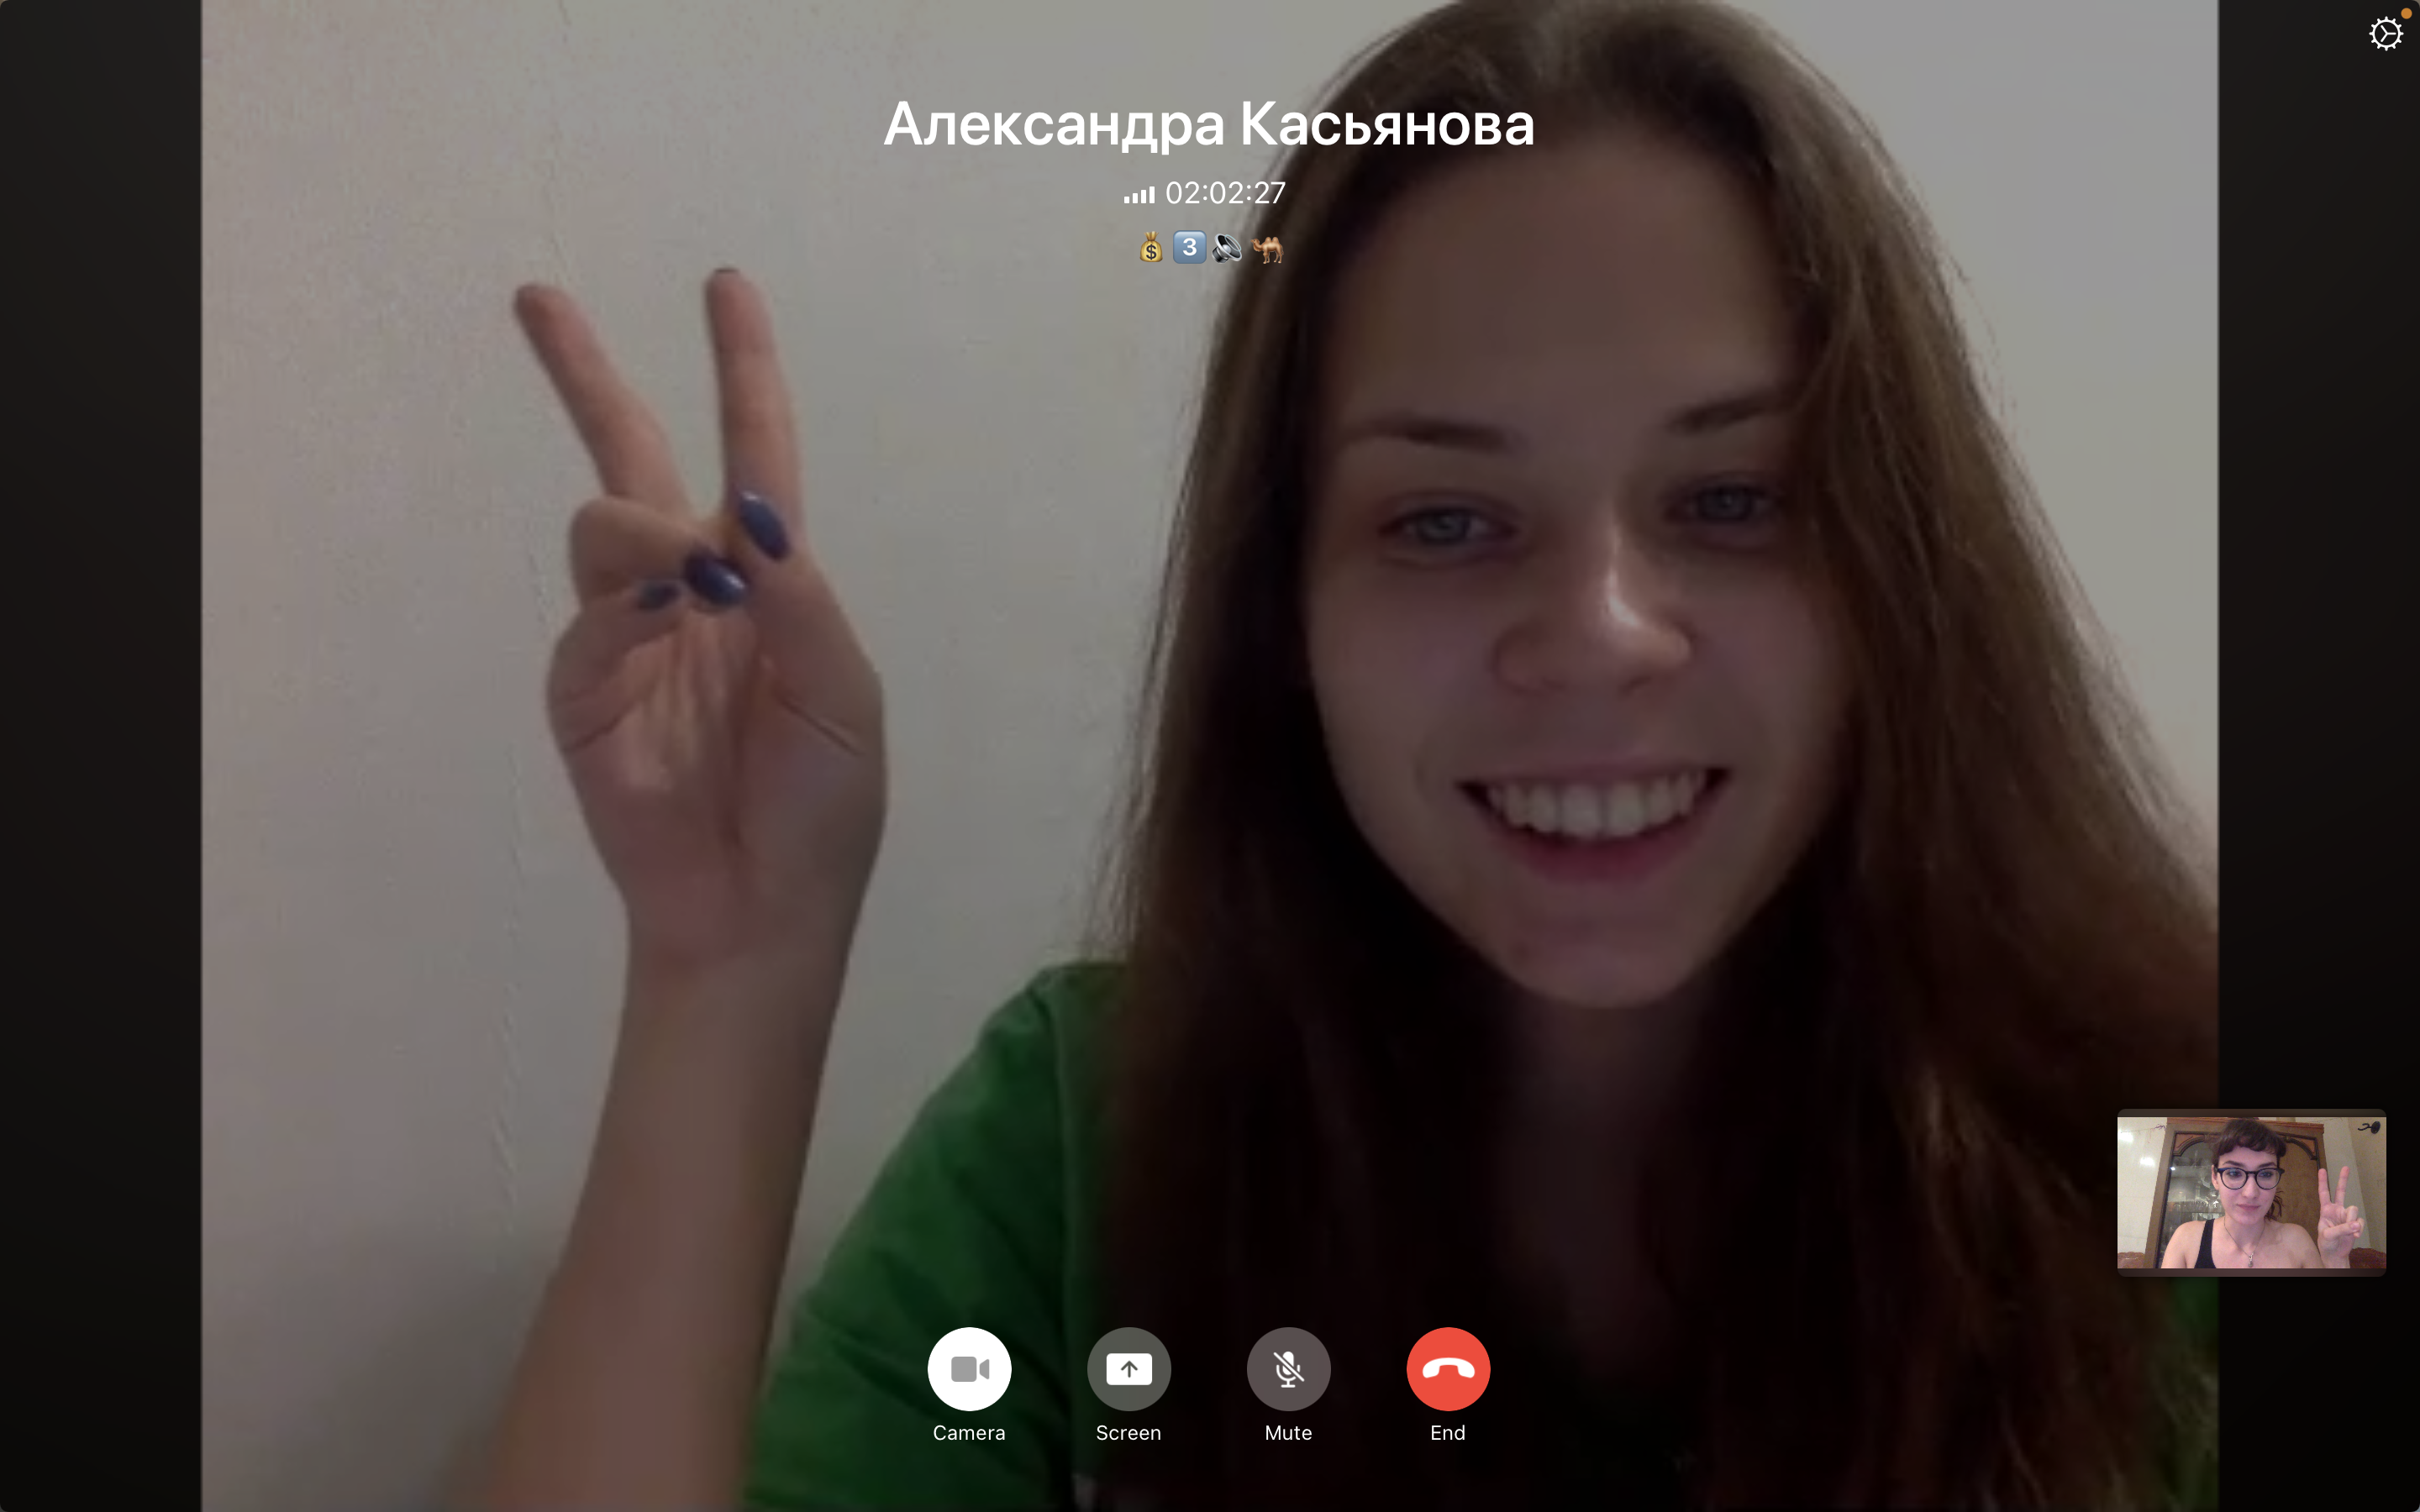

Кот Люк устал два часа ботать статистику - но не мы с Сашей :)

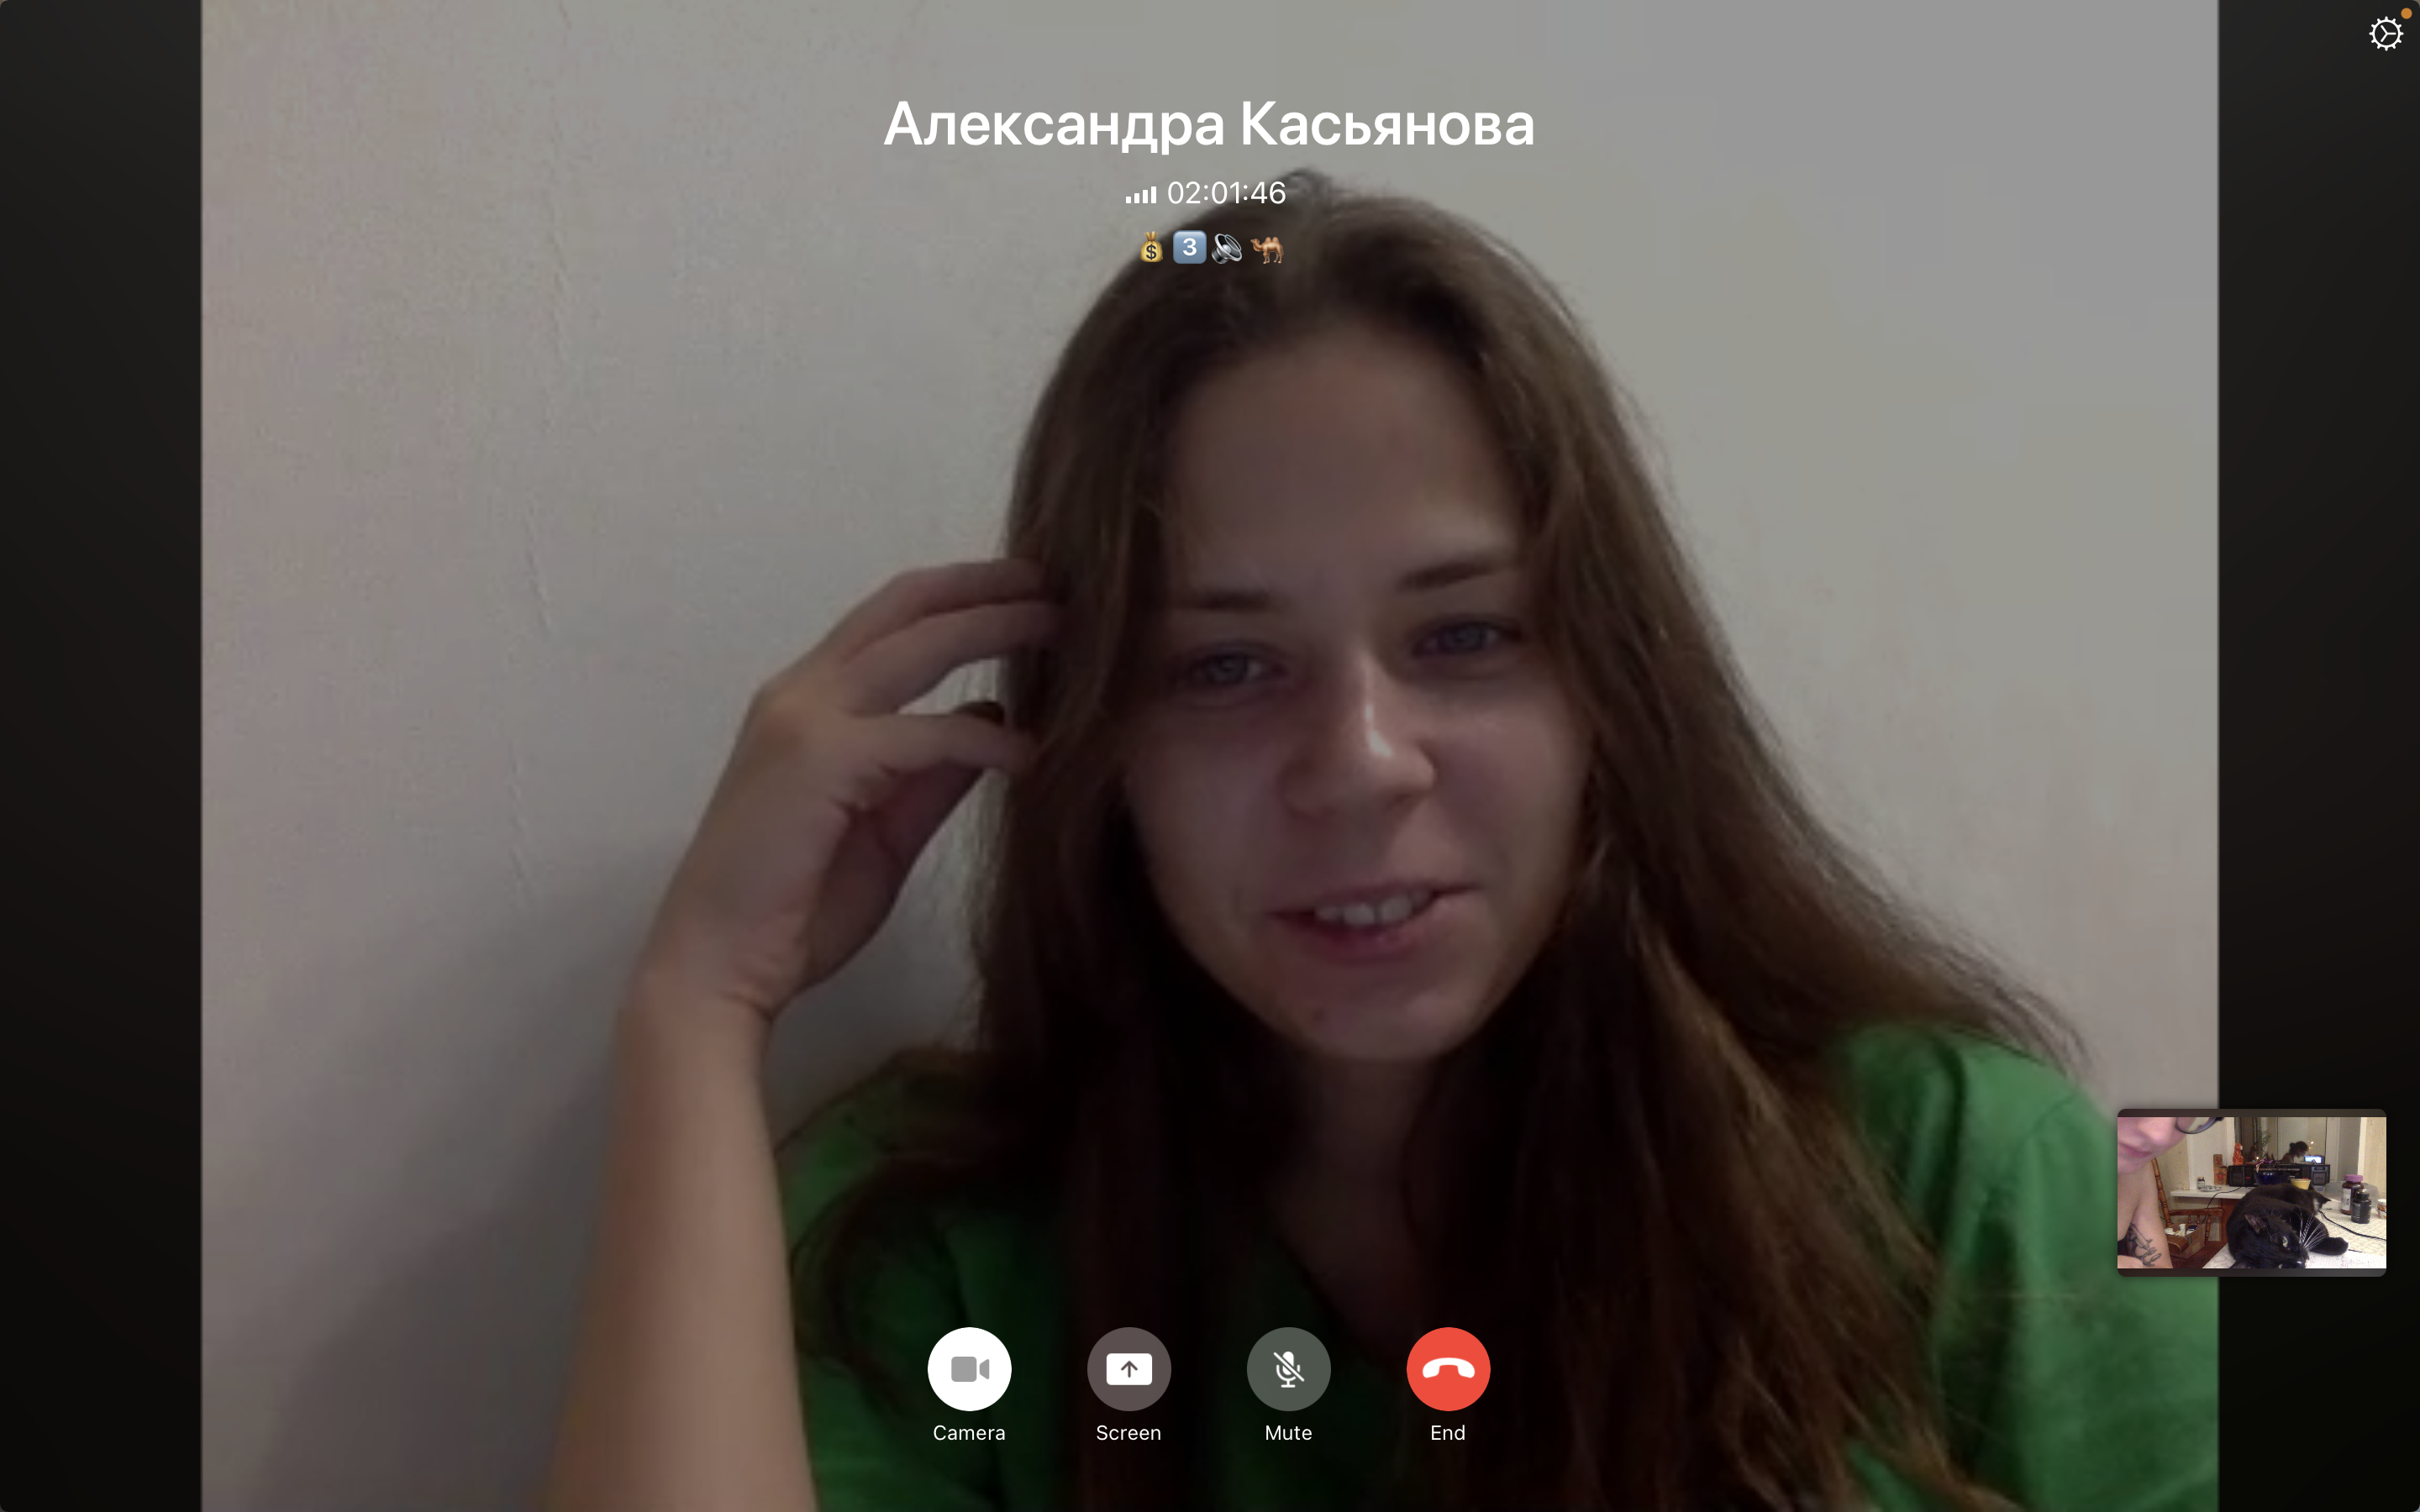